<a href="https://colab.research.google.com/github/strongeryoung/class_SmartDataAnalysis/blob/main/Time_Series_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 사전 작업

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm


%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import seaborn as sns

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# [출처] [파이썬] colab에서 plt 한글깨짐 해결|작성자 서울시립대 통계학과

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
# [출처] [파이썬] colab에서 plt 한글깨짐 해결|작성자 서울시립대 통계학과

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,497 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and dire

In [ ]:
pip install finance-datareader


In [ ]:
import FinanceDataReader as fdr

# Time Seriese Data

- 시계열 데이터란?

  Time series analysis is the endeavor of extracting meaningful summary and statistical information from points arranged in chronological order.
  (Practical Time Series Analysis (Aileen Nielsen, Oreilly))

- 주요 적용분야

  - 의료
  - 기상
  - 경제학 (주가 등)
  - 천문학


# 시계열 데이터의 종류

## 백색잡음 (White Noise Process)

- 어떤 범주안의 데이터가 지속적으로 random 하게 발생 (ex : 심장박동)

- 과거의 데이터는 중요하지 않음

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


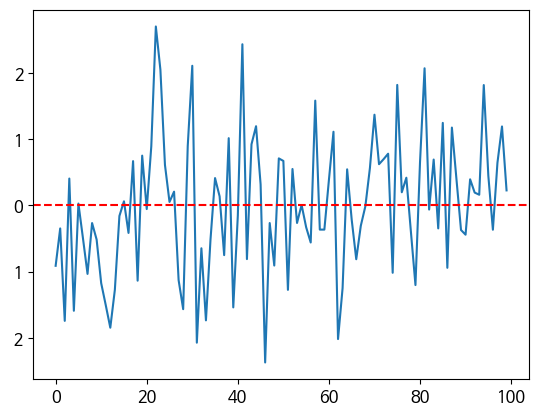

In [ ]:
# 시계열의 길이 설정
n = 100

# 평균이 0이고 표준편차가 1인 정규분포에서 무작위로 n개의 값을 생성
white_noise = np.random.normal(0, 1, n)

# 생성된 백색잡음 데이터 출력
plt.plot(white_noise)
plt.axhline(0,0,100, color='red', linestyle = '--')
plt.show()

## 확률보행과정 (Random Walk Process)

- 직전 데이터 에서 일정 확률로 특정한 분포를 가지는 무작위 값(random value)로 상승 또는 하락하는 특징

- 자산가격 (ex : 주가)이 가장 대표적인 확률보행과정을 가짐

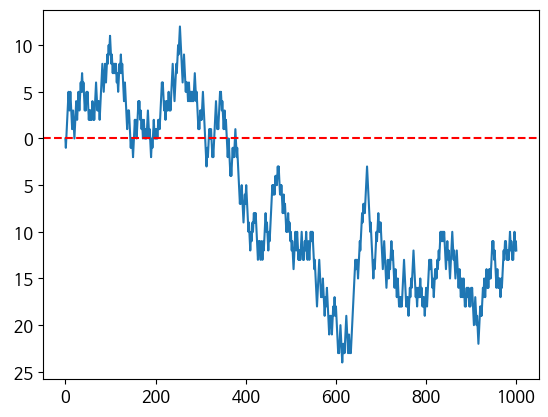

In [ ]:
def random_walk(n):
    # 초기값은 0으로 설정
    x = np.zeros(n+1)

    for t in range(1, n+1):
        # 현재 시간 단계의 변화는 -1 또는 1 중에서 랜덤하게 선택
        step = np.random.choice([-1, 1])
        # 현재 시간 단계의 값은 이전 시간 단계의 값에 변화를 더함
        x[t] = x[t-1] + step

    return x

# random_walk 함수를 사용하여 길이가 100인 random walk 생성
n = 1000
walk = random_walk(n)

# 생성된 random walk 데이터 출력
plt.plot(walk)
plt.axhline(0,0,100, color='red', linestyle = '--')
plt.show()

**<코드 해설>**

`np.random.choice([-1, 1])`은
NumPy 라이브러리를 사용하여 리스트 `[-1, 1]`에서 무작위로 하나의 요소를 선택하는 코드입니다.이 코드를 실행하면 매번 -1 또는 1 중 하나가 무작위로 선택되어 반환됩니다. 예를 들어, 코드를 여러 번 실행하면 때때로 -1이 반환되고 때때로 1이 반환될 것입니다.



## 정상확률과정 (Stationary Process)

- 가장 대표적인 시계열 데이터

- 직전 데이터에서 일정부분을 반영하여 현재의 데이터가 발생 확률을 예측

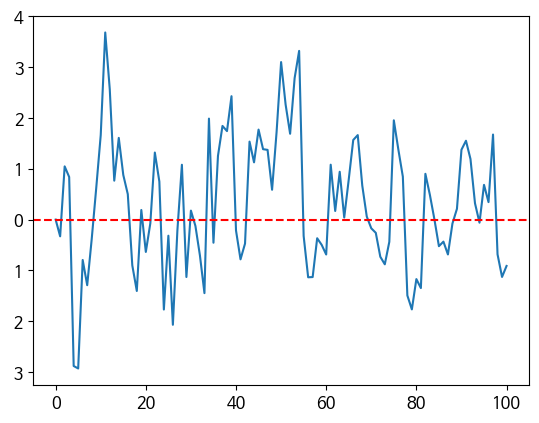

In [ ]:
data = np.array([0])
A_corr = 0.5

for i in range(100):
    data = np.append(data, data[-1]*A_corr + np.random.normal(0,1,1))

 # 생성된 random walk 데이터 출력
plt.plot(data)
plt.axhline(0,0,100, color='red', linestyle = '--')
plt.show()

**<코드 해설>**

이 코드는 파이썬에서 NumPy와 Matplotlib 라이브러리를 사용하여 실행됩니다. 코드는 다음과 같은 작업을 수행합니다:

1. `data`라는 이름의 NumPy 배열을 생성하고, 초기값으로 0을 가지는 하나의 원소를 가진다.

2. `A_corr` 변수를 0.9로 초기화한다.

3. 반복문을 통해 100번의 반복을 수행한다.

   - 매 반복마다 `data` 배열에 새로운 값을 추가한다. 이 값은 `data` 배열의 마지막 요소에 `A_corr`를 곱하고, 평균이 0이고 표준편차가 1인 정규 분포에서 뽑은 랜덤한 값이다.

4. 반복문이 끝나면 `data` 배열에는 초기값인 0을 포함한 총 101개의 요소가 들어있게 된다.

5. 그 후, `plt.plot(data)`를 사용하여 `data` 배열의 값을 그래프로 그린다.

6. `plt.axhline(0,0,100, color='red', linestyle = '--')`는 y축에 빨간색 점선을 추가한다.

7. `plt.show()`를 사용하여 그래프를 출력한다.

결과적으로, 이 코드는 평균이 0이고 표준편차가 1인 정규 분포에서 생성된 랜덤한 값을 이용하여 랜덤 워크(Random Walk) 데이터를 생성하고, 이를 그래프로 시각화한다. 랜덤 워크는 시간에 따라 무작위로 변하는 값의 수열을 나타내는 수학적 개념입니다.

## 브라운 운동 (Brownian Motion)

- 1827년 식물학자 로터트 브라운이 꽃가루 입자에서 발견

- 아인슈타인이 브라운 운동방정식, 물리학자 페랭이 증명

- 1973년 피셔 블랙과 마이런 숄즈가 옵션 가격 결정이론

- 증권, 은행에서 판매되는 ELS 상품이 브라운 운동에 기반

[100, 99.38956045320508, 99.90673106938856, 100.02448001124874, 99.03141332917919, 101.28141498823608, 101.67271158256169, 102.77222468727815, 102.39876079882129, 100.94225418437865, 99.74528892547514, 100.4775550926864, 101.40780161540424, 102.2057956777125, 102.06365339797081, 102.54687275365873, 102.32851405908605, 103.68371822623575, 103.10758342282126, 102.8754126464568, 104.18030896509062, 104.33231924975496, 104.33458770725346, 105.74437404550497, 105.40557878200707, 105.19252683850317, 105.67531818554282, 105.12168634513718, 104.76247018084133, 105.22755480640912, 105.44136635961992, 103.94343545375587, 101.93293419829574, 101.3902776442548, 102.60439555338213, 99.65236099540417, 100.04837012522825, 99.00120184436282, 97.72703533176409, 97.48438107741356, 97.87926072909143, 98.12825380162407, 99.0223199196185, 98.66188607923064, 96.9330230970897, 99.74989821242148, 100.79137176017609, 100.614961082837, 99.40875426539309, 100.37036028896468, 99.23270019564575, 100.06266832173367

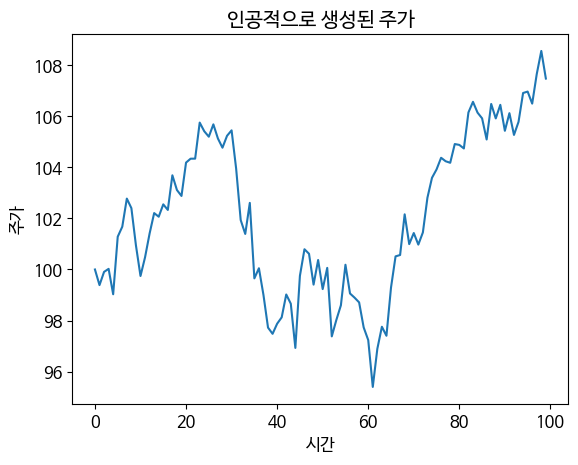

In [ ]:
def generate_stock_prices(n, initial_price, volatility):
    prices = [initial_price]

    for _ in range(n-1):
        # 무작위한 변화 생성 (여기서는 정규분포를 사용)
        price_change = np.random.normal(0, volatility)
        new_price = prices[-1] + price_change
        prices.append(new_price)

    return prices

# generate_stock_prices 함수를 사용하여 주가 생성
n = 100
initial_price = 100  # 초기 주가
volatility = 1  # 주가의 변동성

stock_prices = generate_stock_prices(n, initial_price, volatility)

# 생성된 주가 데이터 출력
print(stock_prices)

# 주가 시각화
plt.plot(stock_prices)
plt.title("인공적으로 생성된 주가")
plt.xlabel("시간")
plt.ylabel("주가")
plt.show()

**<코드 해설>**

이 코드는 다음과 같은 작업을 수행합니다:

1. `n`번의 반복을 수행합니다. `n`은 어떤 값으로 미리 설정되어 있어야 합니다.

2. 매 반복마다 다음의 작업을 수행합니다:

   - `np.random.normal(0, volatility)`는 평균이 0이고 표준편차가 `volatility`인 정규 분포에서 무작위한 값을 생성합니다. 이 값은 가격의 변화를 나타냅니다.

   - `new_price = prices[-1] + price_change`는 이전 가격(`prices[-1]`)에 무작위한 변화(`price_change`)를 더하여 새로운 가격을 계산합니다.

   - `prices.append(new_price)`는 계산된 새로운 가격을 `prices` 리스트에 추가합니다.

결과적으로, 이 코드는 초기 가격을 기반으로 정규분포를 사용하여 가격의 변화를 생성하고, 이를 이전 가격에 더하여 새로운 가격을 계산합니다. 이 과정을 `n-1`번 반복하여 가격의 시계열 데이터를 생성합니다. 이것은 가격의 무작위한 변동을 시뮬레이션하는 간단한 모델을 나타냅니다.

# 데이터의 정상성 분석

## 데이터의 정상성(Stationarity)이란?

데이터의 정상성을 확인하기 위해 주로 다음과 같은 세 가지 조건을 만족

>1. **Constant Mean (상수 평균)**: 시계열 데이터의 평균이 시간에 따라 일정해야 합니다. 시계열 데이터가 평균 주위에서 주기적으로 오르거나 내려가면 정상성을 만족하지 않습니다.
>
>2. **Constant Variance (상수 분산)**: 시계열 데이터의 분산이 시간에 따라 일정해야 합니다. 분산이 시간에 따라 변하면 정상성을 만족하지 않습니다.
>
>3. **Autocovariance (자기 공분산)이 시간의 함수여야 함**: 시차(lag)에 대한 자기 공분산은 시간에 의존하지 않아야 합니다. 다시 말해, 과거의 자료와 현재의 자료 간의 관계가 시간에 따라 변하지 않아야 합니다.

정상성을 가지는 데이터는 예측이나 분석이 더 용이하며, 다양한 시계열 분석 기법을 적용. 만약 데이터가 정상성을 만족하지 않으면, 변환 기법이나 시계열 분해 등을 사용하여 정상성을 확보하는 전처리 과정 필요

## 주요 경제지표의 정상성 진단

- ADF Test

ADF(Augmented Dickey-Fuller) 테스트는 시계열 데이터의 정상성을 진단하는 통계적인 방법 중 하나입니다. 이 테스트는 단위근(unit root) 문제를 검정하여 데이터가 정상성을 만족하는지 확인합니다. 단위근 문제란 시계열 데이터가 시간에 따라 변하는 추세를 가지고 있는지를 나타내는 개념입니다.

ADF 테스트의 귀무가설(H0)은 "단위근이 존재한다"이며, 대립가설(H1)은 "단위근이 존재하지 않는다"입니다. 따라서 귀무가설이 기각될 경우, 데이터는 정상성을 만족한다고 할 수 있습니다.

ADF 테스트의 기본 회귀 모델은 다음과 같습니다:

$$
\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \ldots + \delta_{p-1} \Delta y_{t-p+1} + \varepsilon_t
$$

여기서:
- $(\Delta$는 차분(Difference)을 나타냅니다. 시계열 데이터의 현재 값과 이전 값의 차이를 의미합니다.
- $\ (y_t) $는 시간 $t$에서의 시계열 데이터입니다.
- $t$는 시간 변수로, 추세를 나타냅니다.
- $ \alpha, \beta, \gamma $ 등은 모수들을 나타냅니다.

ADF 테스트 결과로 얻는 통계량과 임계값을 비교하여 귀무가설을 기각할지 말지를 결정합니다. 일반적으로 통계 소프트웨어나 패키지를 사용하면 이러한 계산은 자동으로 이루어집니다.

ADF 테스트를 통해 정상성을 확인하는 과정은 다음과 같습니다:

>1. ADF 테스트 통계량을 계산합니다.
2. 계산된 통계량과 임계값을 비교합니다.
3. 만약 계산된 통계량이 임계값보다 작다면, 귀무가설을 기각하고 데이터는 정상성을 만족한다고 판단합니다.

ADF 테스트는 시계열 데이터의 정상성을 평가하는 중요한 도구 중 하나이며, 많은 시계열 분석에서 사용됩니다.

In [ ]:
date_info = datetime.now().strftime('%Y-%m-%m')
print(date_info)

fx_df = fdr.DataReader('USD/KRW', '2021-01-01', date_info)
fx_df.tail(10)

2023-11-11


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-23,1349.339966,1354.859985,1343.869995,1349.339966,1349.339966,0
2023-10-24,1334.439941,1347.130005,1339.660034,1334.439941,1334.439941,0
2023-10-25,1343.640015,1352.430054,1343.130005,1343.640015,1343.640015,0
2023-10-26,1352.680054,1360.150024,1352.199951,1352.680054,1352.680054,0
2023-10-27,1350.339966,1357.449951,1348.040039,1350.339966,1350.339966,0
2023-10-30,1355.219971,1355.239990,1345.910034,1355.219971,1355.219971,0
2023-10-31,1348.069946,1355.260010,1345.520020,1348.069946,1348.069946,0
2023-11-01,1350.160034,1359.150024,1347.729980,1350.160034,1350.160034,0
2023-11-02,1347.839966,1346.469971,1328.119995,1347.839966,1347.839966,0


<Axes: xlabel='Date'>

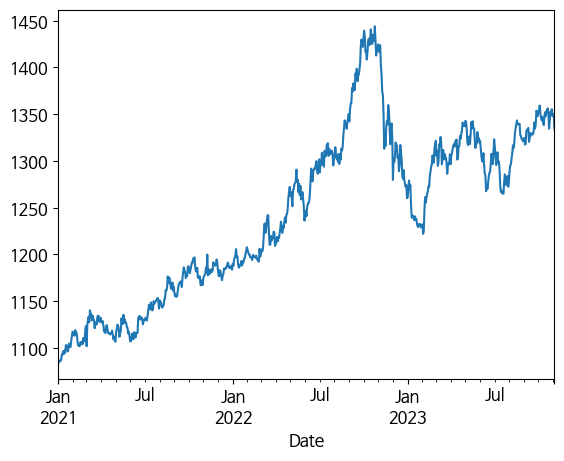

In [ ]:
# 전형적인 Non-Stationary 상태를 보이는 원- 달러 환율

fx_df['Adj Close'].plot()

In [ ]:
# 'Adj Close' 열 선택
adj_close = fx_df['Adj Close']
# ADF 테스트 수행
result = adfuller(adj_close)

# 결과 출력
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.4984268933677347
p-value: 0.5342893882362161
Critical Values: {'1%': -3.439290485895927, '5%': -2.8654856985173414, '10%': -2.568871126669587}


## 지표의 정상성 전환

- 차분이란?

정상성을 확보하기 위한 차분(Differencing)은 시계열 데이터에서 이전 시간대의 값을 현재 시간대의 값과 뺌으로써 추세나 계절성을 제거하는 과정

    - 시계열 데이터에서는 일반적으로 시간에 따라 변하는 추세, 계절성 등의 패턴이 존재

    - 패턴들은 데이터가 정상성을 만족하지 않게 만들 수 있음. 따라서 데이터를 정상성을 만족하도록 변환하는 전처리 과정이 필요한데, 이것을 차분이라 함

    - 일반적으로는 1차 차분을 많이 사용. 1차 차분은 현재 시점의 값에서 이전 시점의 값을 뺀 것

$$ \Delta y_t = y_t - y_{t-1} $$


<Axes: xlabel='Date'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


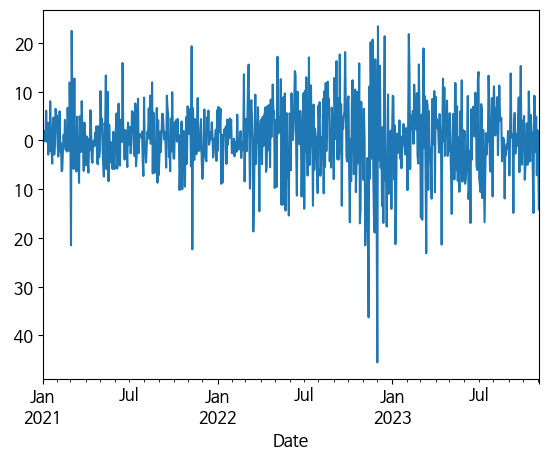

In [ ]:
fx_df['Adj_Close_diff'] = fx_df['Adj Close'].diff()

fx_df['Adj_Close_diff'].plot()

In [ ]:
fx_df_drop = fx_df.dropna()

In [ ]:
# ADF 테스트 수행
result = adfuller(fx_df_drop['Adj_Close_diff'])

# 결과 출력
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -11.267137789882359
p-value: 1.569343026733951e-20
Critical Values: {'1%': -3.439290485895927, '5%': -2.8654856985173414, '10%': -2.568871126669587}


# ACF, PACF 분석

## **ACF (자기상관함수)**:

자기상관함수(ACF)는 주어진 시차(lag) k에 대한 상관계수를 의미합니다.

수학적으로는 다음과 같이 정의됩니다:

$$ ACF(k) = \frac{\sum_{t=1}^{T-k}(Y_t - \bar{Y})(Y_{t+k} - \bar{Y})}{\sum_{t=1}^{T}(Y_t - \bar{Y})^2}\ $$


  여기서,

1. $ Y_t $는 시계열 데이터의 t번째 관측치

2. $ \bar{Y} $는 시계열 데이터의 평균

3. T는 전체 관측치의 수

4. k는 시차(lag)를 나타냅니다.


## **PACF (부분자기상관함수)**:

부분자기상관함수(PACF)는 다른 시차들의 영향을 배제하고 특정 시차 k에 대한 상관계수를 의미합니다.

수학적으로는 일반적으로 다음과 같이 정의됩니다:

$$ PACF(k) = \frac{\Gamma_{kk}}{\sqrt{\Gamma_{00}\Gamma_{kk}}} $$

여기서,
- $ \Gamma_{kk}\ $는 k번째 시차의 자기상관계수,
- $ \Gamma_{00}\ $는 0번째 시차(자기자신)의 자기상관계수를 나타냅니다.

PACF는 일반적으로 Yule-Walker 방정식 등을 사용하여 계산됩니다.

이러한 수학적 공식들은 시계열 데이터의 자기상관 구조를 이해하고, 이를 기반으로 모델을 선택하거나 예측을 수행하는 데 활용됩니다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


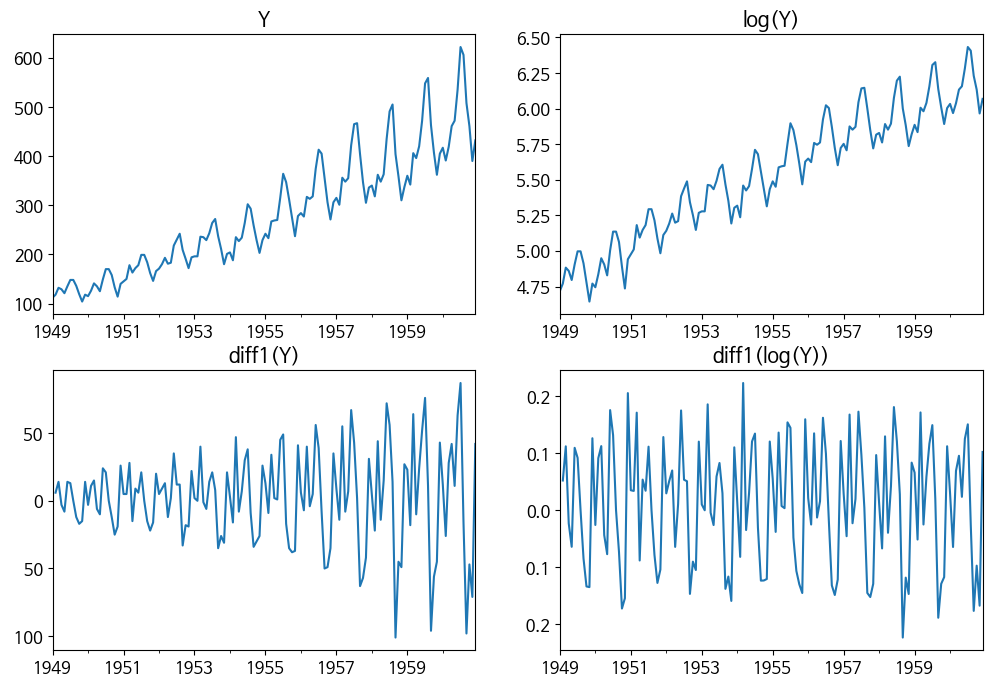

In [ ]:
# 데이터 전처리
# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()

if 'time' in raw.columns:
    raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
    del raw['time']

## 정상성 확보
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

<ipython-input-21-5208b6f620e1>:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


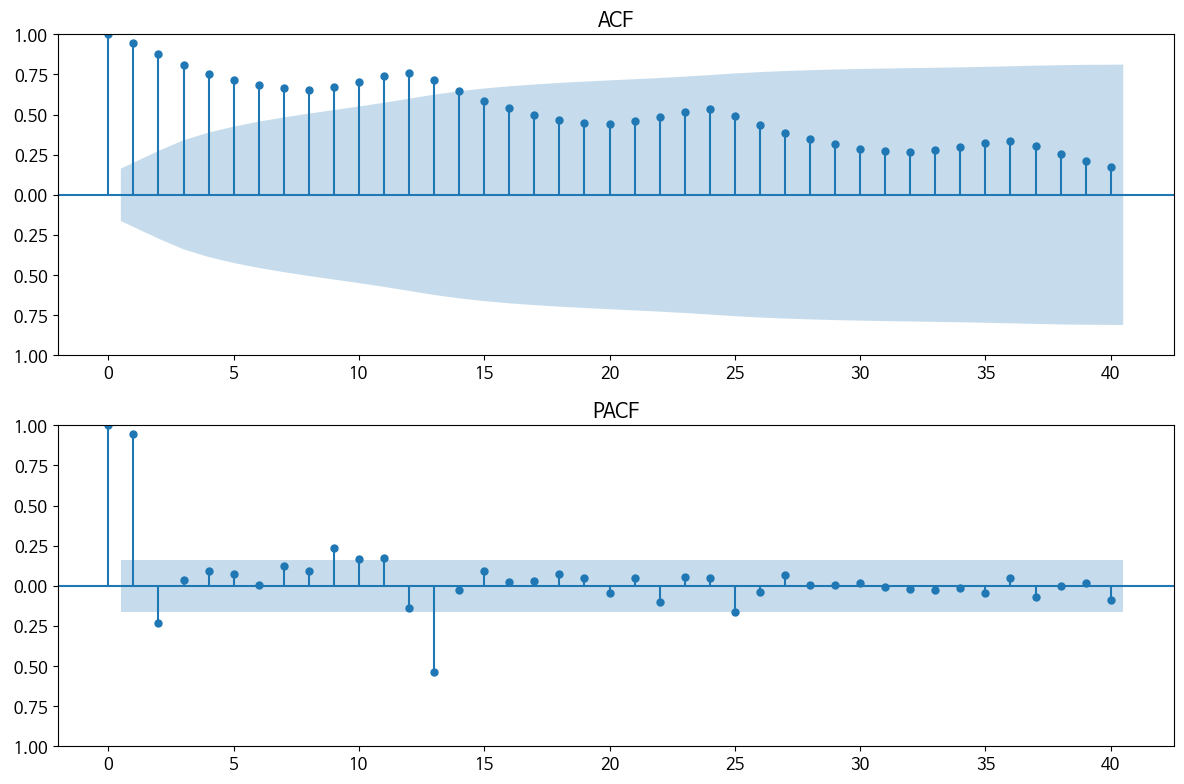

In [ ]:
# ACF와 PACF 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF 그리기
sm.graphics.tsa.plot_acf(raw['value'], lags=40, ax=ax1)
ax1.set_title('ACF')

# PACF 그리기
sm.graphics.tsa.plot_pacf(raw['value'], lags=40, ax=ax2)
ax2.set_title('PACF')

plt.tight_layout()
plt.show()

# AR, MA, ARMA 모형




## **MA(q) 모형이란?**

> **"$MA(q)$: 알고리즘의 차수($q$)가 유한한 가우시안 백색잡음과정의 선형조합"**


MA(q) 모형은 이동평균 모형(Moving Average Model)의 한 종류입니다. 여기서 q는 모형의 차수를 나타냅니다. MA(q) 모형은 시계열 데이터를 모델링하는데 사용되며, 이전 시점의 백색잡음(white noise) 오차항들의 선형 결합으로 현재 시점의 값을 예측합니다.

여기서 "백색 잡음"은 평균이 0이고, 일정한 분산을 가지며 서로 독립적인 확률 변수들의 시퀀스를 의미합니다. 이러한 백색 잡음 항들은 시계열 데이터의 랜덤한 변동성을 나타냅니다.

MA(q) 모형은 q개의 이전 시점의 백색 잡음을 사용하여 현재 시점의 값을 예측하는 모델을 나타냅니다. 이때 q는 MA 모형의 차수를 나타냅니다.

수학적으로 MA(q) 모형은 다음과 같이 표현됩니다:

$$
Y_t = \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q}
$$

- MA(1) 모형

$$
Y_t = \epsilon_t + \theta_1\epsilon_{t-1}
$$


<ipython-input-22-68641a67457b>:13: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


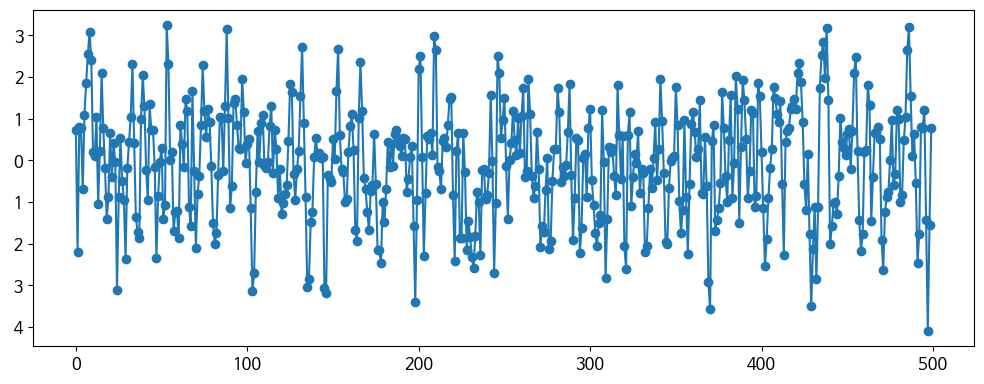

<ipython-input-22-68641a67457b>:37: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


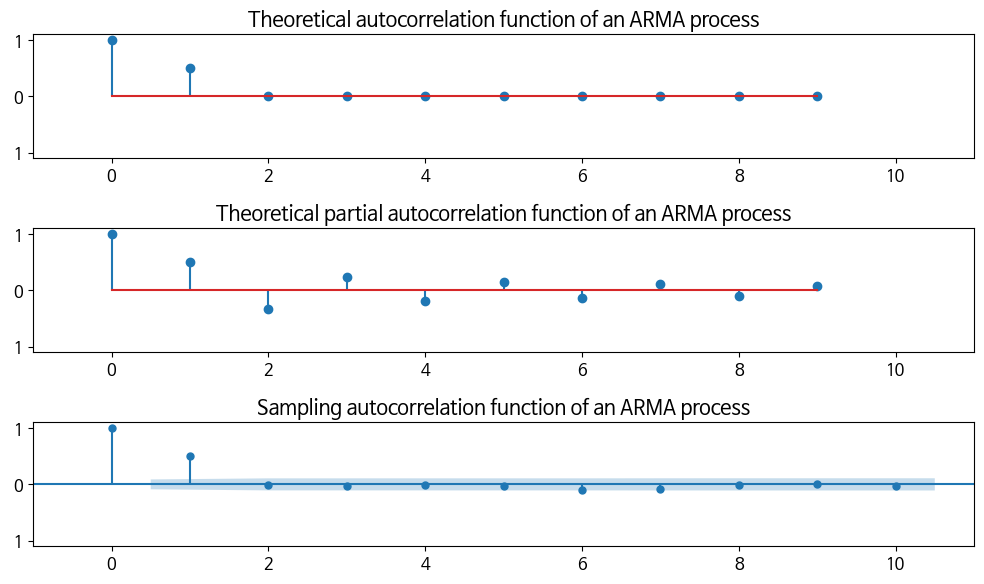

In [ ]:
### MA(1)

plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.9])

ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]

y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)

plt.plot(y, 'o-')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")


plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")


sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))

plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

**<코드 해설>**

1. `plt.figure(figsize=(10, 4))`: 이 코드는 새로운 그림(figure)을 생성합니다. `figsize=(10, 4)`는 그림의 크기를 가로로 10인치, 세로로 4인치로 설정합니다.

2. `np.random.seed(123)`: 난수 생성을 위한 시드(seed)를 설정합니다. 이렇게 하면 난수의 시퀀스가 항상 동일하게 생성됩니다.

3. `ar_params = np.array([])`: `ar_params`라는 빈 NumPy 배열을 생성합니다. 이 배열은 자동회귀(AR) 모형의 파라미터를 나타냅니다.

4. `ma_params = np.array([0.9])`: `ma_params`라는 NumPy 배열을 생성하고 값으로 0.9를 가집니다. 이 배열은 이동평균(MA) 모형의 파라미터를 나타냅니다.

5. `ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]`: `ar_params`와 `ma_params`를 이용하여 ARMA 모형의 파라미터를 설정합니다. `np.r_` 함수는 배열을 합치는 역할을 합니다. 여기서는 1을 앞에 붙여줌으로써 모형의 다항식을 완성합니다.

   예를 들어, 만약 `ar_params`가 [0.2, -0.3]이라면, `ar`은 [1, -0.2, 0.3]이 됩니다. 이는 ARMA 모형의 자동회귀 부분의 파라미터를 나타냅니다.

6. `y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)`: ARMA 모형을 생성하고 시계열 데이터를 생성합니다. `generate_sample` 메서드는 ARMA 모형에서 무작위로 생성된 샘플 데이터를 생성합니다. 이 경우에는 500개의 데이터를 생성하며, 처음 50개의 데이터는 버립니다(`burnin=50`). `y`에는 생성된 시계열 데이터가 저장됩니다.

7. `plt.plot(y, 'o-')`: 생성된 시계열 데이터 `y`를 그래프로 그립니다. 'o-'는 데이터를 점으로 표시하고, 선으로 연결하라는 의미입니다.

8. `plt.tight_layout()`: 그림의 레이아웃을 조정합니다.

9. `plt.show()`: 그림을 화면에 출력합니다.

종합하면, 이 코드는 ARMA 모형을 사용하여 무작위로 생성된 시계열 데이터를 만들고 이를 그래프로 시각화합니다. ARMA 모형의 파라미터는 `ar_params`와 `ma_params`로 설정되며, 생성된 데이터는 `y`에 저장됩니다.

In [ ]:
# 참고

np.random.seed(42)  # 시드 값을 42로 설정
random_number = np.random.rand()  # 랜덤한 수 생성

# 같은 시드 값을 사용하여 다시 실행하면 동일한 결과를 얻음
np.random.seed(42)
same_random_number = np.random.rand()

print(random_number, same_random_number)  # 같은 값이 출력됨


0.3745401188473625 0.3745401188473625


<ipython-input-23-1010dc08406f>:9: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


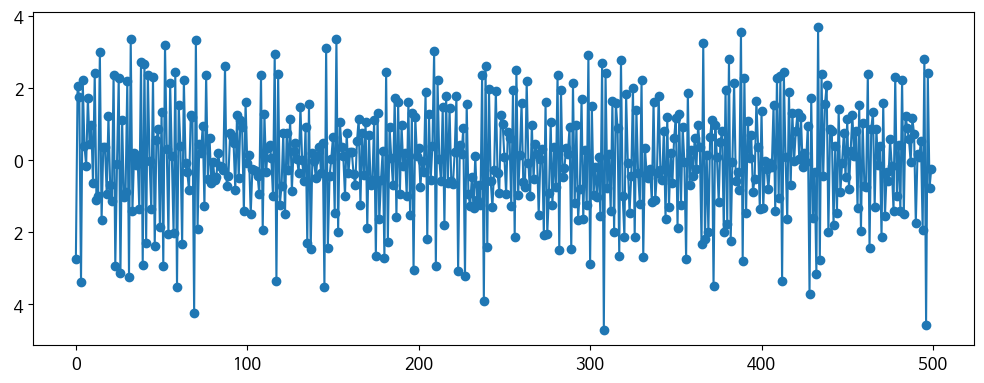

<ipython-input-23-1010dc08406f>:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


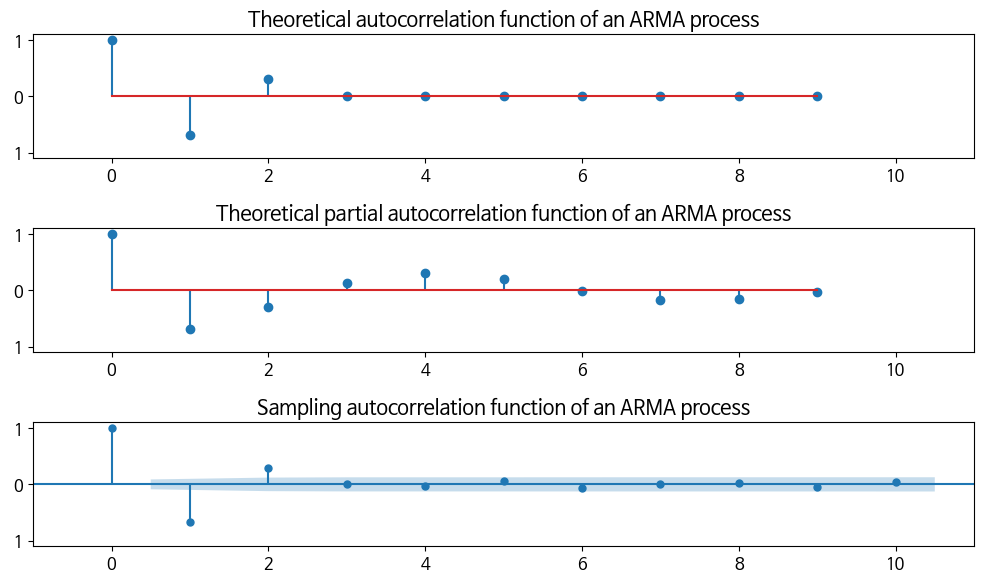

In [ ]:
### MA(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 0.8])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

<ipython-input-25-4bbc9bdb989e>:9: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


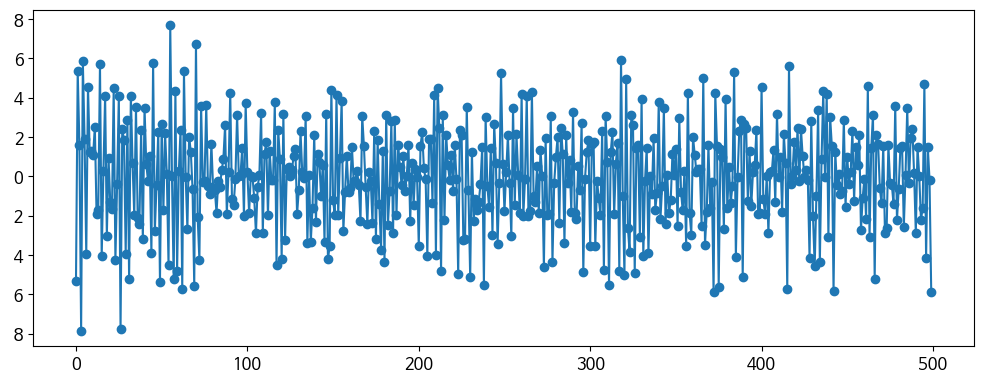

<ipython-input-25-4bbc9bdb989e>:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


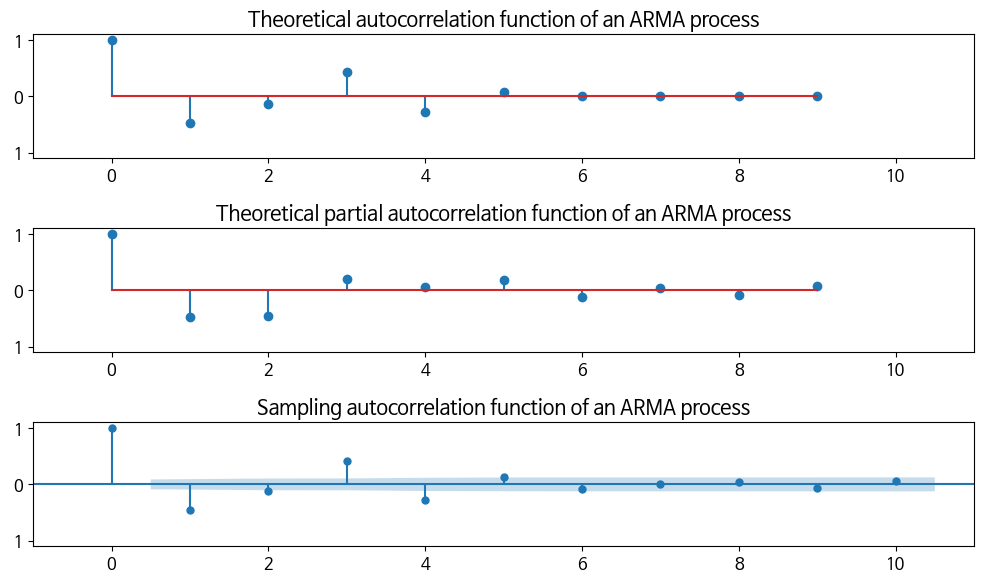

In [ ]:
### MA(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1.1, 1.5, 0.8, -1.4, 0.6])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

## **AR($p$) 모형 이란?**

> **"$AR(p)$: 알고리즘의 차수($p$)가 유한한 자기자신의 과거값들의 선형조합"**

AR(p) 모형은 p개의 이전 시점의 값을 사용하여 현재 시점의 값을 예측하는 모델을 나타냅니다. 이때 p는 AR 모형의 차수를 나타냅니다.

수학적으로 AR(p) 모형은 다음과 같이 표현됩니다.

$$
Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t
$$

- AR(1) 모형

$$
Y_t = \phi_1 Y_{t-1} + \epsilon_t
$$

<ipython-input-26-56e8381ab6af>:13: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


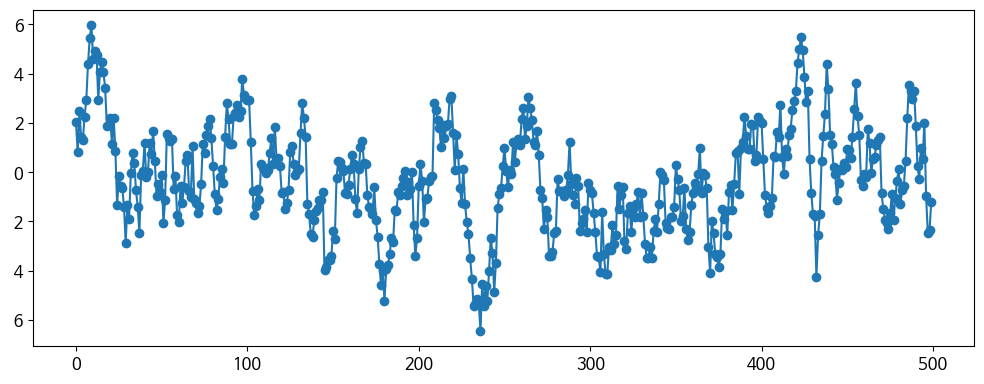

<ipython-input-26-56e8381ab6af>:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


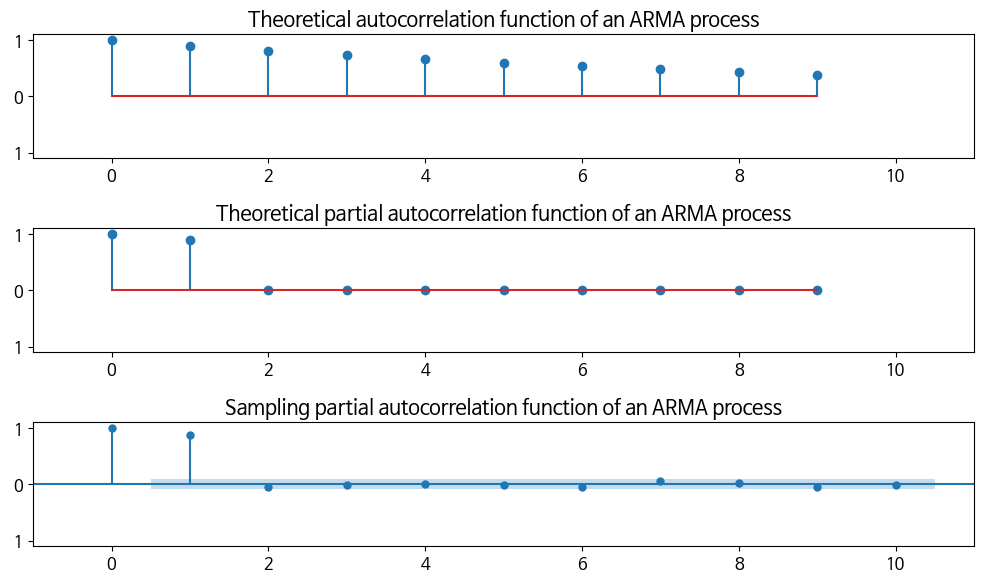

In [ ]:
### AR(1)

plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.9])
ma_params = np.array([])

ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params] # -ar_params 좌변의 이동을 의미하느 것이기 때문에 실제로는 양수이다.

y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)

plt.plot(y, 'o-')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")


plt.subplot(312)

plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")


sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))

plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

### ARMA(Auto-Regressive Moving Average)


<ipython-input-27-ee83de555739>:9: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


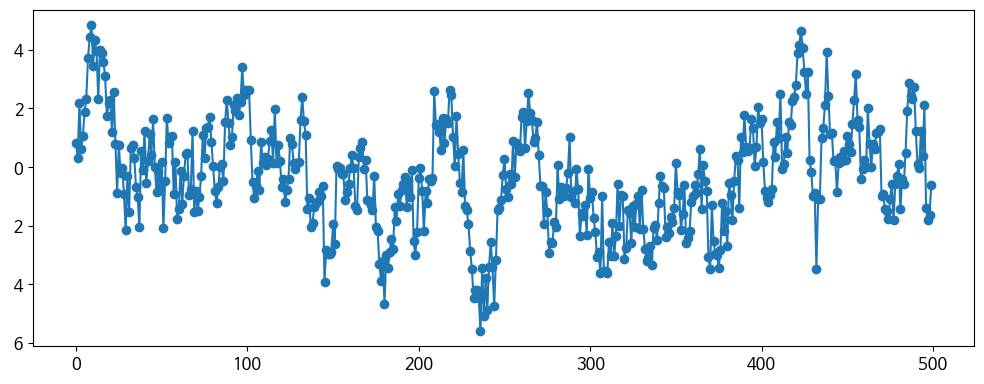

<ipython-input-27-ee83de555739>:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


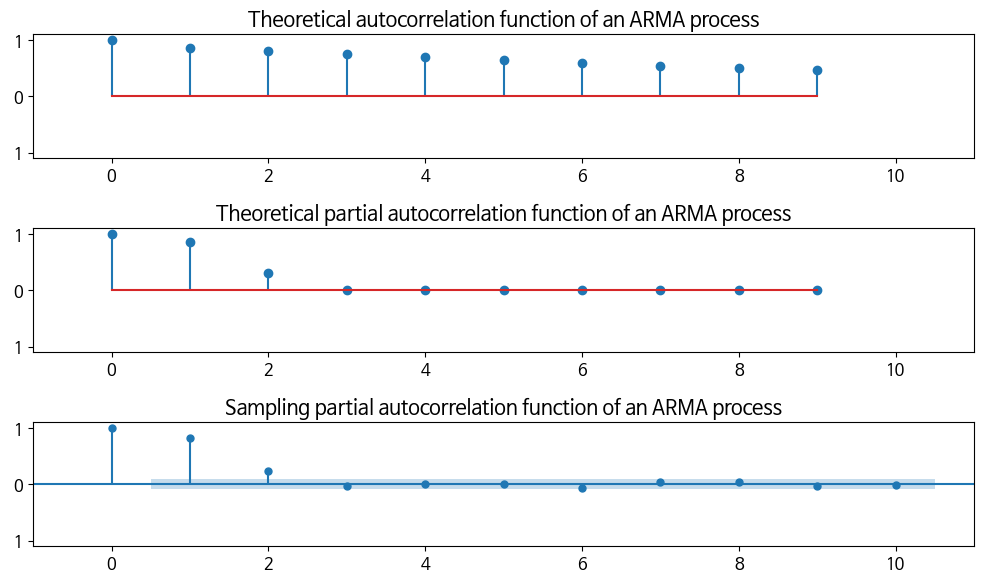

In [ ]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.6, 0.3])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

<ipython-input-39-2873eb6ac552>:9: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


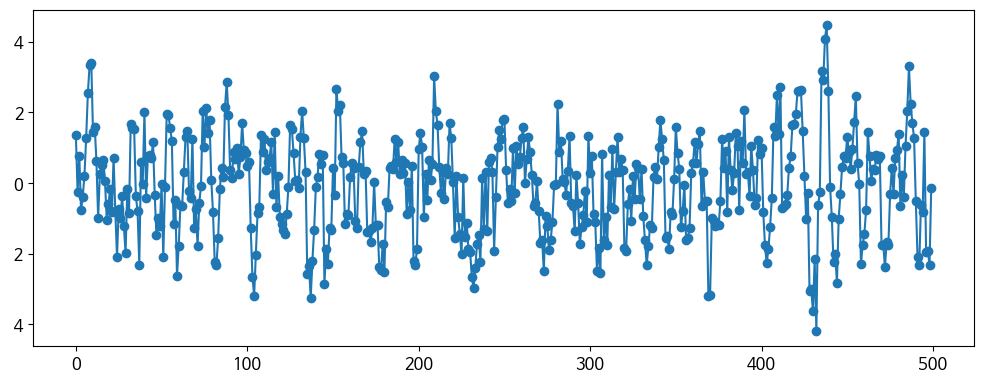

<ipython-input-39-2873eb6ac552>:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


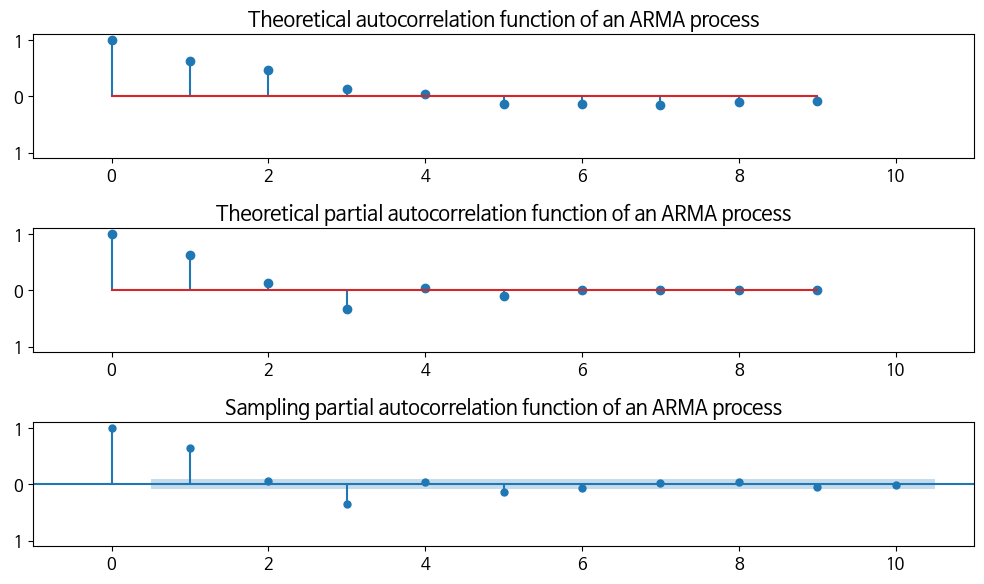

In [ ]:
### AR(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.6, 0.27, -0.33, 0.1, -0.1])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

## 모형별 차수결정의 원리 정리

- **$p$, $q$ 파라미터 추론(by ACF and PACF):**  

1) 정상성 형태 변환: 차분/로그변환/계절성제거 등을 통해 해당 데이터를 정상성 형태로 변환하여 분석

2) $ACF$, $PACF$를 도식화 하여 ARMA의 파라미터 차수를 추론  

| - | 자기회귀: $AR(p)$ | 이동평균: $MA(q)$ | 자기회귀이동평균: $ARMA(p,q)$ |
|----------------------|-------------------------------------------|-------------------------------------------|--------------------------------------------------------------|
| $ACF$ | 지수적 감소, 진동하는 사인 형태 | $q+1$ 차항부터 절단모양(0수렴) | $q+1$ 차항부터 지수적 감소 혹은 진동하는 사인형태 |
| $PACF$ | $p+1$ 차항부터 절단모양(0수렴) | 지수적 감소, 진동하는 사인 형태 | $p+1$ 차항부터 지수적 감소 혹은 진동하는 사인형태 |

## 차수결정의 원리 실습



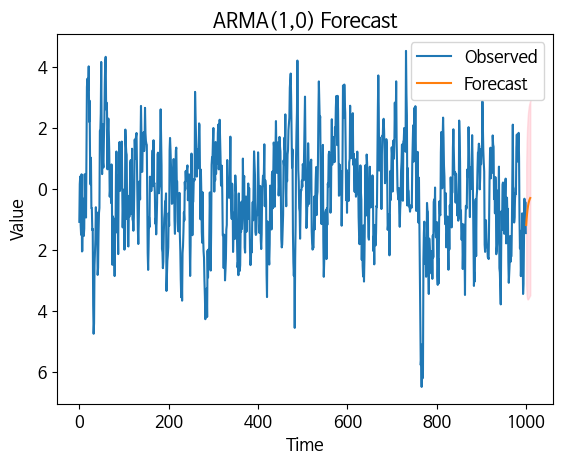

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1419.648
Date:                Sat, 04 Nov 2023   AIC                           2845.296
Time:                        04:34:24   BIC                           2860.019
Sample:                             0   HQIC                          2850.892
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1829      0.151     -1.209      0.227      -0.479       0.114
ar.L1          0.7909      0.019     42.028      0.000       0.754       0.828
sigma2         1.0004      0.045     22.223      0.000       0.912       1.089
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.66   Prob(JB):                         0.93
Heteroskedasticity (H):               1.00   Skew:                            -0.03
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


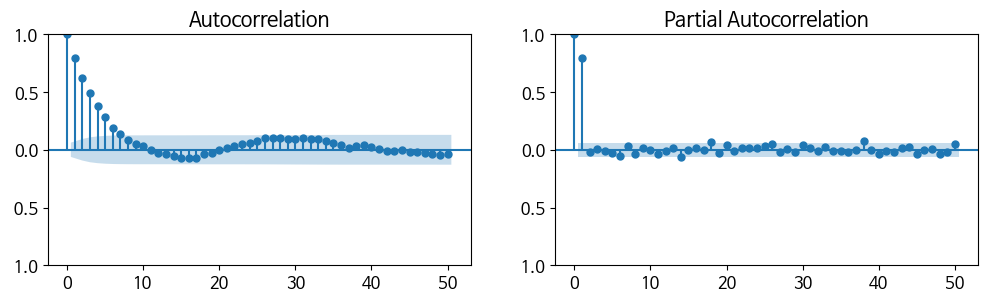

In [ ]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ARMA(1,0) 모델 파라미터 설정
np.random.seed(123)
ar_params = np.array([0.78])
ma_params = np.array([])

# AR, MA 모수 설정
ar = np.r_[1, -ar_params]
ma = np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# ARMA(1,0) 시계열 생성
y = sm.tsa.arma_generate_sample(ar, ma, nsample=1000)

# ARMA(1,0) 모델 피팅
model = sm.tsa.ARIMA(y, order=(ar_order, 0,  ma_order))  # ARIMA(p,d,q)에서 p=1, d=0, q=0로 설정
fit = model.fit()


# 예측
ahead = 10
forecast = fit.get_forecast(steps=ahead)

# 예측 결과 시각화
plt.plot(y, label='Observed')
plt.plot(np.arange(len(y), len(y) + ahead), forecast.predicted_mean, label='Forecast')
plt.fill_between(np.arange(len(y), len(y) + ahead),
                 forecast.conf_int()[:, 0], forecast.conf_int()[:, 1], color='pink', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARMA(1,0) Forecast')
plt.legend()
plt.show()

display(fit.summary())

plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

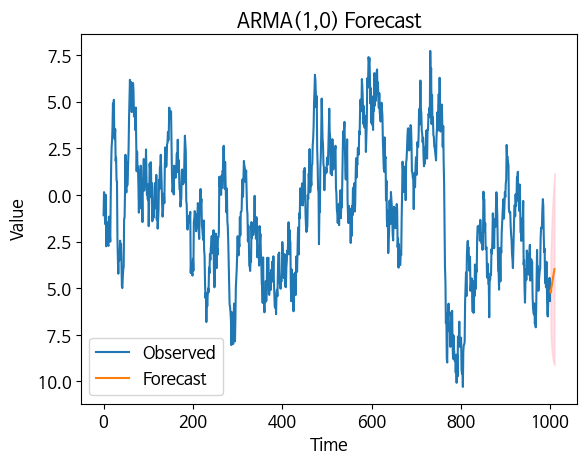

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1420.184
Date:                Sat, 04 Nov 2023   AIC                           2850.367
Time:                        04:35:04   BIC                           2874.906
Sample:                             0   HQIC                          2859.694
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9622      0.771     -1.248      0.212      -2.473       0.549
ar.L1          0.8075      0.032     24.868      0.000       0.744       0.871
ar.L2          0.3012      0.041      7.291      0.000       0.220       0.382
ar.L3         -0.1499      0.033     -4.598      0.000      -0.214      -0.086
sigma2         0.9999      0.045     22.240      0.000       0.912       1.088
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.96   Prob(JB):                         0.92
Heteroskedasticity (H):               1.00   Skew:                            -0.03
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


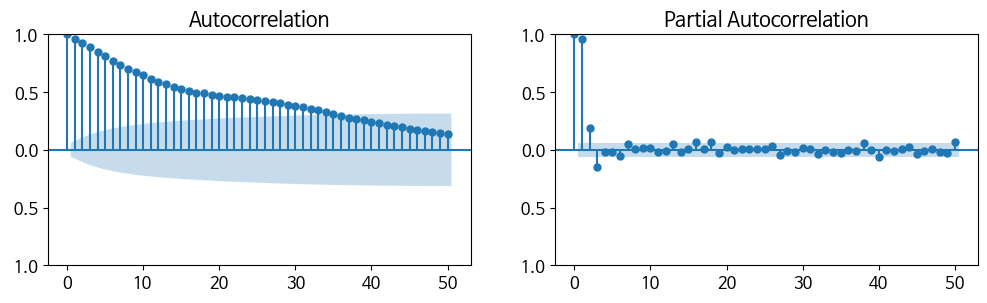

In [ ]:
# ARMA(3,0) 모델 파라미터 설정
np.random.seed(123)
ar_params = np.array([0.78, 0.33, -0.15])
ma_params = np.array([])

# AR, MA 모수 설정
ar = np.r_[1, -ar_params]
ma = np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1


# ARMA 시계열 생성
y = sm.tsa.arma_generate_sample(ar, ma, nsample=1000)

# ARMA(1,0) 모델 피팅
model = sm.tsa.ARIMA(y, order=(ar_order, 0, ma_order))  # ARIMA(p,d,q)에서 p=1, d=0, q=0로 설정
fit = model.fit()


# 예측
ahead = 10
forecast = fit.get_forecast(steps=ahead)

# 예측 결과 시각화
plt.plot(y, label='Observed')
plt.plot(np.arange(len(y), len(y) + ahead), forecast.predicted_mean, label='Forecast')
plt.fill_between(np.arange(len(y), len(y) + ahead),
                 forecast.conf_int()[:, 0], forecast.conf_int()[:, 1], color='pink', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARMA(1,0) Forecast')
plt.legend()
plt.show()

display(fit.summary())

plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()


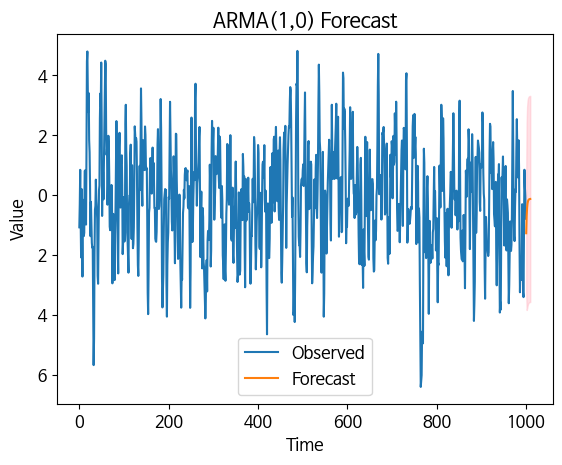

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1419.241
Date:                Sat, 04 Nov 2023   AIC                           2846.482
Time:                        04:35:12   BIC                           2866.113
Sample:                             0   HQIC                          2853.943
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1366      0.112     -1.220      0.222      -0.356       0.083
ar.L1          0.5096      0.031     16.488      0.000       0.449       0.570
ma.L1          0.7328      0.024     29.912      0.000       0.685       0.781
sigma2         0.9989      0.045     22.247      0.000       0.911       1.087
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.83   Prob(JB):                         0.91
Heteroskedasticity (H):               1.00   Skew:                            -0.03
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


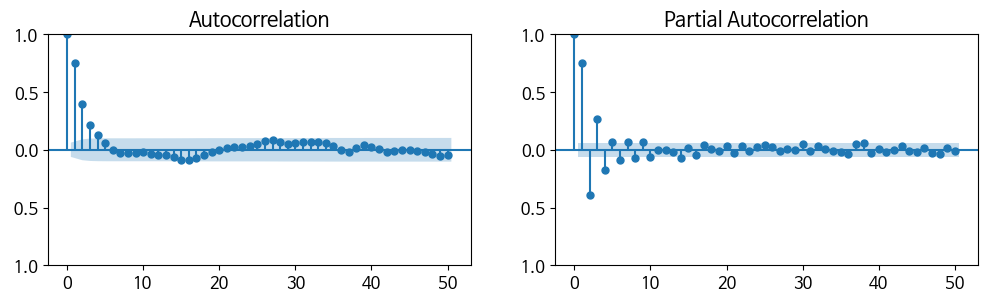

In [ ]:
# ARMA(1,1) 모델 파라미터 설정
np.random.seed(123)
ar_params = np.array([0.5])
ma_params = np.array([0.71])

# AR, MA 모수 설정
ar = np.r_[1, -ar_params]
ma = np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1


# ARMA 시계열 생성
y = sm.tsa.arma_generate_sample(ar, ma, nsample=1000)

# ARMA(1,0) 모델 피팅
model = sm.tsa.ARIMA(y, order=(ar_order, 0, ma_order))  # ARIMA(p,d,q)에서 p=1, d=0, q=0로 설정
fit = model.fit()


# 예측
ahead = 10
forecast = fit.get_forecast(steps=ahead)

# 예측 결과 시각화
plt.plot(y, label='Observed')
plt.plot(np.arange(len(y), len(y) + ahead), forecast.predicted_mean, label='Forecast')
plt.fill_between(np.arange(len(y), len(y) + ahead),
                 forecast.conf_int()[:, 0], forecast.conf_int()[:, 1], color='pink', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARMA(1,0) Forecast')
plt.legend()
plt.show()

display(fit.summary())

plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

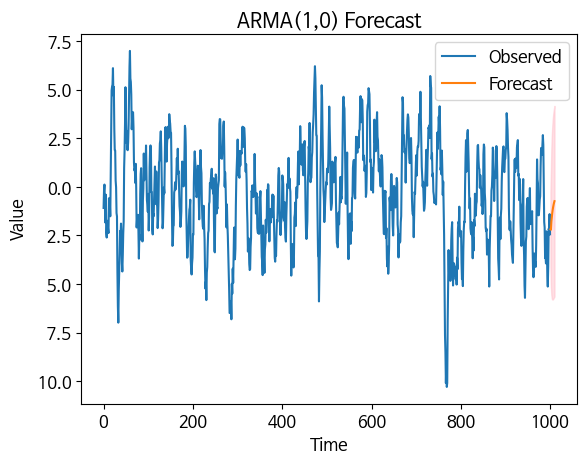

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1419.079
Date:                Sat, 04 Nov 2023   AIC                           2850.157
Time:                        04:37:04   BIC                           2879.604
Sample:                             0   HQIC                          2861.349
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3441      0.278     -1.238      0.216      -0.889       0.201
ar.L1          0.5549      0.108      5.161      0.000       0.344       0.766
ar.L2          0.2264      0.098      2.306      0.021       0.034       0.419
ma.L1          0.5721      0.104      5.489      0.000       0.368       0.776
ma.L2          0.3418      0.035      9.853      0.000       0.274       0.410
sigma2         0.9982      0.045     22.254      0.000       0.910       1.086
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.97   Prob(JB):                         0.94
Heteroskedasticity (H):               1.01   Skew:                            -0.03
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


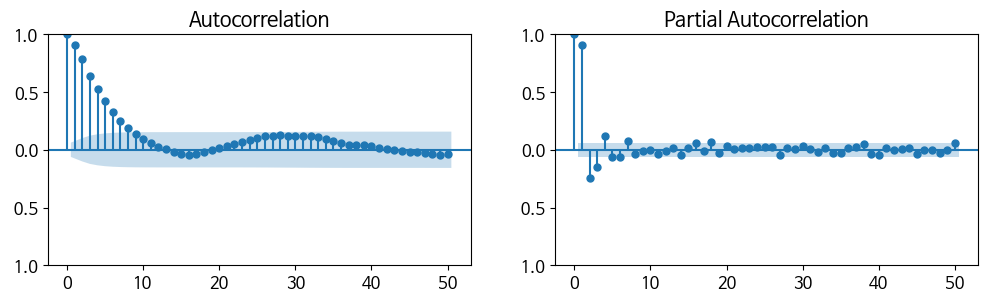

In [ ]:
# ARMA(2,2) 모델 파라미터 설정
np.random.seed(123)
ar_params = np.array([0.55, 0.23])
ma_params = np.array([0.55, 0.33])

# AR, MA 모수 설정
ar = np.r_[1, -ar_params]
ma = np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1


# ARMA 시계열 생성
y = sm.tsa.arma_generate_sample(ar, ma, nsample=1000)

# ARMA(1,0) 모델 피팅
model = sm.tsa.ARIMA(y, order=(ar_order, 0, ma_order))  # ARIMA(p,d,q)에서 p=1, d=0, q=0로 설정
fit = model.fit()


# 예측
ahead = 10
forecast = fit.get_forecast(steps=ahead)

# 예측 결과 시각화
plt.plot(y, label='Observed')
plt.plot(np.arange(len(y), len(y) + ahead), forecast.predicted_mean, label='Forecast')
plt.fill_between(np.arange(len(y), len(y) + ahead),
                 forecast.conf_int()[:, 0], forecast.conf_int()[:, 1], color='pink', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARMA(1,0) Forecast')
plt.legend()
plt.show()

display(fit.summary())

plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

# ARIMA Model Analysis

ARIMA는 AutoRegressive Integrated Moving Average의 약자로, 시계열 데이터를 모델링하고 예측하는 데 사용되는 통계적 모델입니다. ARIMA 모델은 자기회귀(AR), 차분(Integrated), 이동평균(MA) 세 가지 요소를 결합한 모델입니다.

ARIMA 모델은 다음의 세 가지 파라미터로 정의됩니다:

1. **AR(p)**: 자기회귀(AR)의 차수 p는 현재 시점의 값이 이전 시점의 값들의 선형 결합으로 예측될 수 있다는 가정을 나타냅니다.

   예를 들어, AR(2) 모델은 현재 시점의 값을 이전 2개의 시점의 값들의 가중합으로 예측합니다.

2. **I(d)**: 차분(Differencing)의 차수 d는 데이터를 d번 빼서 정상성을 확보하는 과정을 나타냅니다. 정상성은 시계열 데이터가 시간에 따라 일정한 평균과 분산을 가지는 상태를 말합니다.

3. **MA(q)**: 이동평균(MA)의 차수 q는 현재 시점의 값이 백색 잡음(white noise)의 선형 결합으로 예측될 수 있다는 가정을 나타냅니다. 이 때 백색 잡음은 평균이 0이고, 일정한 분산을 가지며 서로 독립적인 확률 변수들의 시퀀스를 의미합니다.

ARIMA 모델의 수학적 표현은 다음과 같습니다:

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \varepsilon_t - \theta_1 \varepsilon_{t-1} - \theta_2 \varepsilon_{t-2} - \ldots - \theta_q \varepsilon_{t-q}\
$$


여기서,
- $X_t$는 현재 시점 t의 시계열 데이터,
- $ \phi_1, \phi_2, \ldots, \phi_p $는 AR 모형의 파라미터,
- $ \varepsilon_t $는 백색 잡음 항으로, 현재 시점의 랜덤한 변동성을 나타냅니다,
- $ \theta_1, \theta_2, \ldots, \theta_q $는 MA 모형의 파라미터입니다.

ARIMA 모델은 시계열 데이터를 효과적으로 모델링하고 예측하는 데 사용됩니다. ARIMA 모델은 AR, MA, ARMA 모델의 특별한 경우로 볼 수 있습니다.

## Box Jenkins 모형

### 분석싸이클 정리(Non-seasonal)

**1. 분석싸이클 제시: [<박스-젠킨스 방법론>](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method)**

박스-젠킨스(Box-Jenkins) 방법론은 시계열 데이터 분석 및 예측을 위한 통계적 모델링 방법론입니다. 이 방법론은 ARIMA(AutoRegressive Integrated Moving Average) 모델을 사용하여 시계열 데이터를 모델링하고 예측하는 절차를 제공합니다.

다음은 박스-젠킨스 방법론의 주요 단계입니다:

1. **시계열 데이터 수집 및 시각화**:
   - 먼저, 대상 시계열 데이터를 수집하고 시각화하여 데이터의 패턴과 특성을 파악합니다.

2. **데이터 전처리**:
   - 이상치나 결측치 등을 처리하고, 필요한 경우 데이터를 변환하여 정상성을 확보합니다. 정상성이란 시계열 데이터가 시간에 따라 일정한 평균과 분산을 가지는 상태를 의미합니다.

3. **모델 선택**:
   - ACF(자기상관함수)와 PACF(부분자기상관함수)를 사용하여 적절한 ARIMA 모델의 파라미터(p,d,q)를 선택합니다.
   - p: 자기회귀(AR)의 차수
   - d: 차분(Differencing)의 차수
   - q: 이동평균(MA)의 차수

4. **ARIMA 모델 피팅**:
   - 선택한 파라미터를 사용하여 ARIMA 모델을 데이터에 피팅합니다.

5. **모델 평가**:
   - 모델의 적합성을 평가하기 위해 예측값과 실제값을 비교하고, 평가 지표를 사용하여 모델의 성능을 평가합니다.

6. **예측**:
   - 피팅된 모델을 사용하여 미래 값을 예측합니다.

박스-젠킨스 방법론은 초기에는 ARIMA 모델을 기반으로 하지만, 후에는 다양한 확장된 모델들도 포함하게 되었습니다. 이 방법론은 시계열 데이터의 특성을 잘 파악하고 적절한 모델을 선택하여 예측하는데 유용합니다.


## ARMA의 적용사례

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

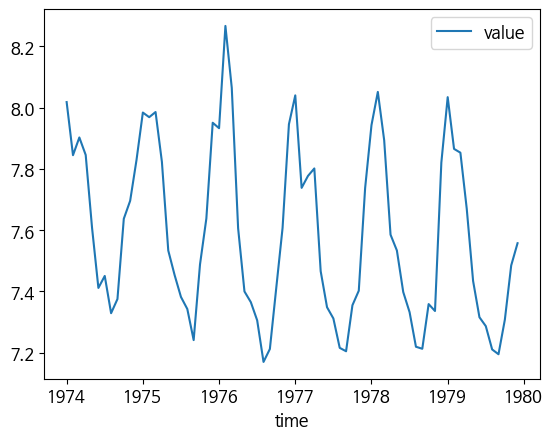

In [ ]:
# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("deaths", "MASS")
raw = data.data
raw.value = np.log(raw.value)
raw.plot(x='time', y='value')
plt.show()


In [ ]:
raw['date'] = pd.date_range(start='1/1/1974', periods=len(raw['time']), freq='M')
raw = raw[['date', 'value']].copy()
raw = raw.set_index('date')

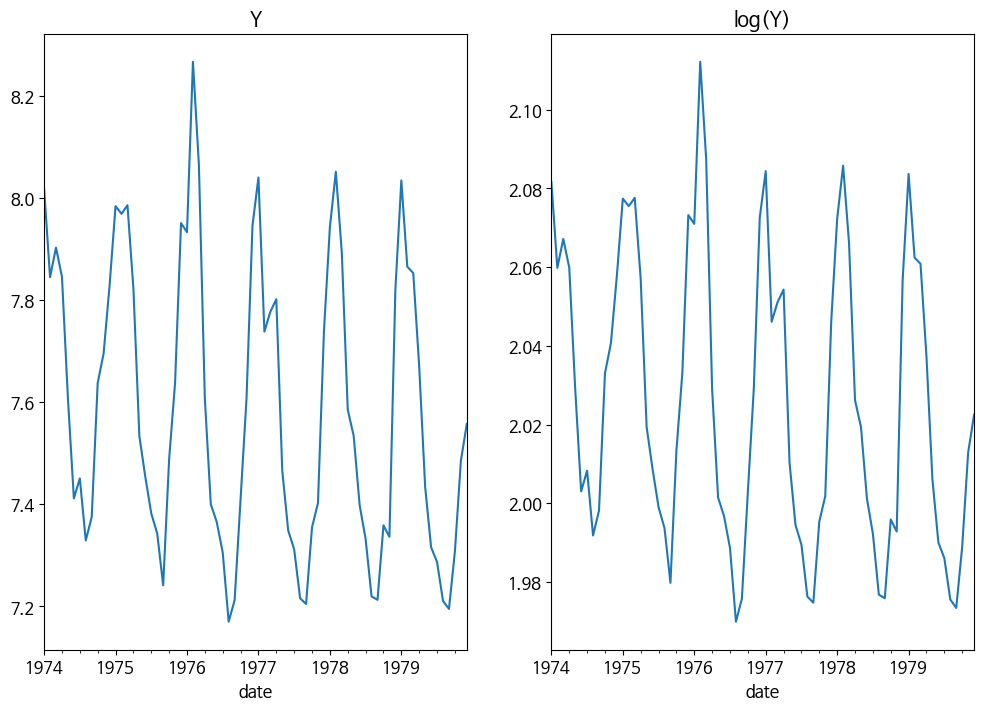

In [ ]:
## 정상성 확보
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(121), title='Y', legend=False)
np.log(raw).plot(ax=plt.subplot(122), title='log(Y)', legend=False)
plt.show()


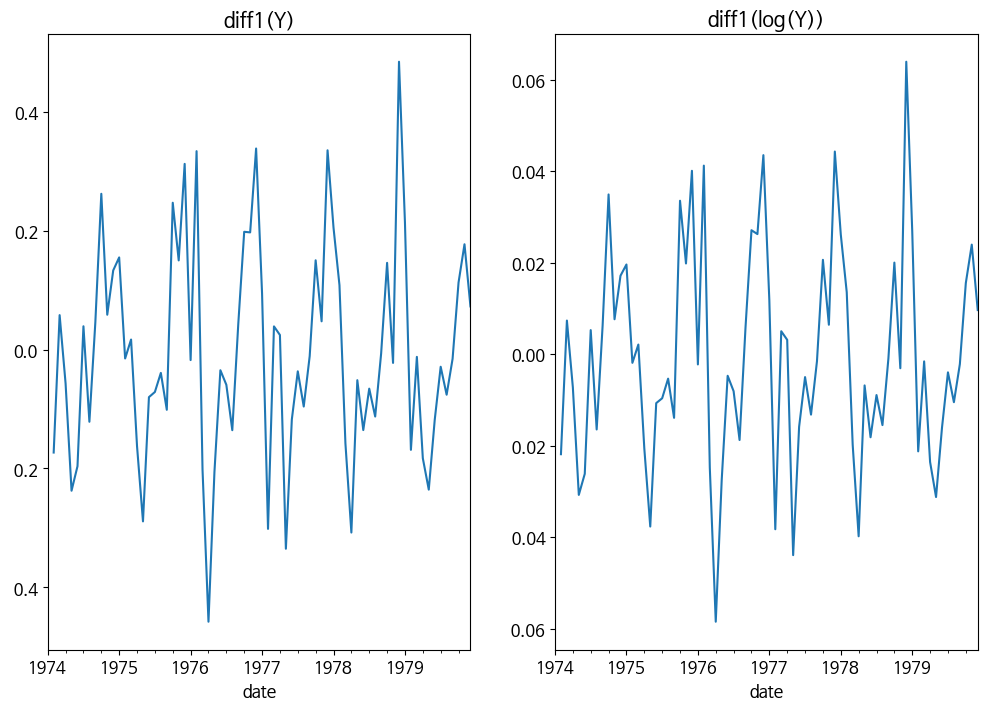

In [ ]:
plt.figure(figsize=(12,8))
raw.diff(1).plot(ax=plt.subplot(121), title='diff1(Y)', legend=False)
np.log(raw).diff(1).plot(ax=plt.subplot(122), title='diff1(log(Y))', legend=False)
plt.show()

In [ ]:
# ADF 테스트 수행
result = adfuller(raw['value'])

# 결과 출력
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.6964948693899677
p-value: 0.847655357824709
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}


In [ ]:
# ADF 테스트 수행

raw['diff'] = raw['value'].diff()

result = adfuller(raw['diff'].dropna())

# 결과 출력
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -6.493175901622196
p-value: 1.212358826679441e-08
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}


In [ ]:
# ADF 테스트 수행

raw['log_diff'] = np.log(raw['value']).diff()

result = adfuller(raw['log_diff'].dropna())

# 결과 출력
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -6.435883108331464
p-value: 1.6533486561074557e-08
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}


In [ ]:
raw

,value,diff,log_diff
date,,,
1974-01-31,8.017967,NaN,NaN
1974-02-28,7.844633,-0.173334,-0.021855
1974-03-31,7.902487,0.057855,0.007348
1974-04-30,7.845416,-0.057071,-0.007248
1974-05-31,7.607878,-0.237538,-0.030745
...,...,...,...
1979-08-31,7.210818,-0.076058,-0.010493
1979-09-30,7.195187,-0.015631,-0.002170
1979-10-31,7.307873,0.112685,0.015540


In [ ]:
raw_drop = raw.dropna()

In [ ]:
raw_drop

,value,diff,log_diff
date,,,
1974-02-28,7.844633,-0.173334,-0.021855
1974-03-31,7.902487,0.057855,0.007348
1974-04-30,7.845416,-0.057071,-0.007248
1974-05-31,7.607878,-0.237538,-0.030745
1974-06-30,7.411556,-0.196322,-0.026144
...,...,...,...
1979-08-31,7.210818,-0.076058,-0.010493
1979-09-30,7.195187,-0.015631,-0.002170
1979-10-31,7.307873,0.112685,0.015540


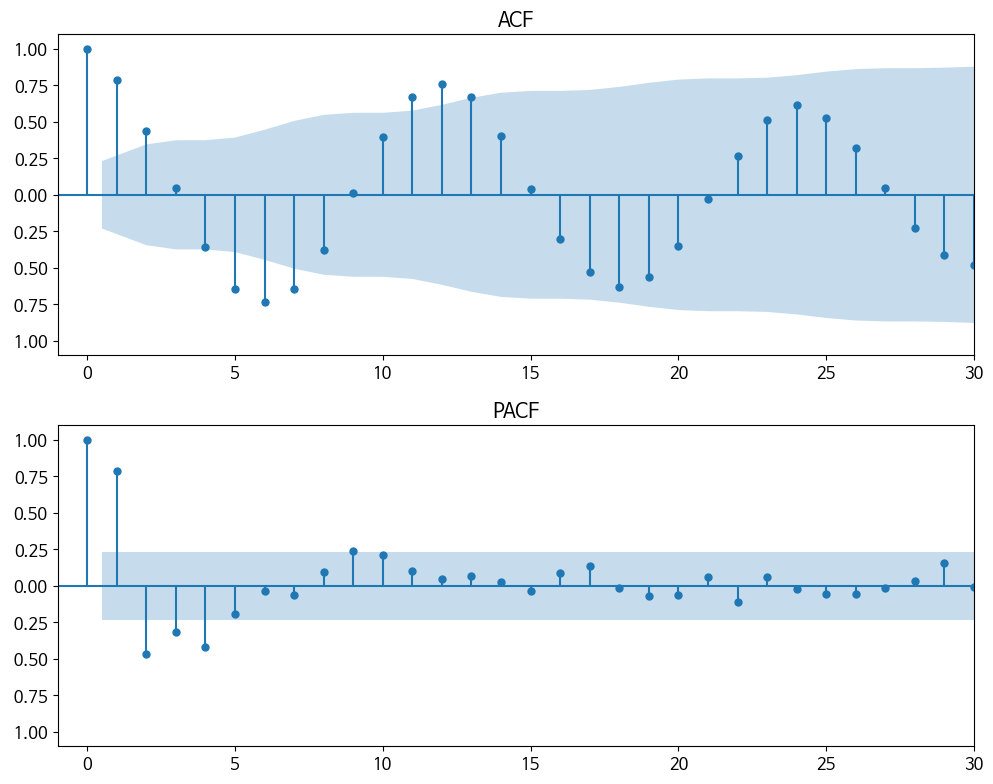

In [ ]:
# ACF/PACF 확인
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(raw.value.values, lags=30, ax=plt.subplot(211))
plt.xlim(-1, 30)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

sm.graphics.tsa.plot_pacf(raw.value.values, lags=30, ax=plt.subplot(212))
plt.xlim(-1, 30)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

In [ ]:
# ARMA(1,1) 모델링
fit = sm.tsa.ARIMA(raw.value, order = (0,1,2)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  26.483
Date:                Sat, 04 Nov 2023   AIC                            -46.966
Time:                        04:48:11   BIC                            -40.178
Sample:                    01-31-1974   HQIC                           -44.267
                         - 12-31-1979                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3852      0.150      2.576      0.010       0.092       0.678
ma.L2          0.0353      0.145      0.243      0.808      -0.250       0.320
sigma2         0.0277      0.004      6.531      0.000       0.019       0.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.98   Prob(JB):                         0.28
Heteroskedasticity (H):               1.12   Skew:                             0.39
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMAX(ARMA with eXogenous)

- ARMA 모형과 ARMAX 모형

\begin{align*}
\text{Equation of ARMA} && Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} +
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\
\text{Equation of ARMAX} && Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} +
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t + \beta X \\
\end{align*}

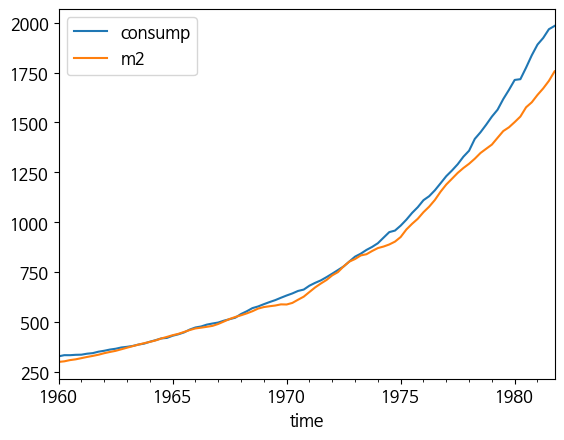

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consump   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.721e+04
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          7.72e-101
Time:                        04:48:35   Log-Likelihood:                -434.48
No. Observations:                  88   AIC:                             873.0
Df Residuals:                      86   BIC:                             877.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.7547      7.788     -7.930      0.000     -77.237     -46.273
m2             1.1406      0.009    131.182      0.000       1.123       1.158
==============================================================================
Omnibus:                        0.847   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.669
Skew:                           0.213   Prob(JB):                        0.716
Kurtosis:                       2.984   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

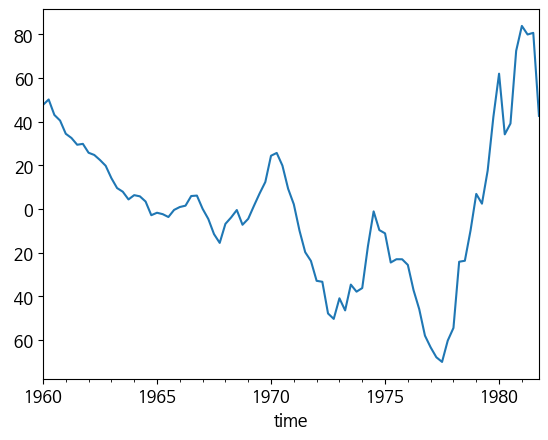

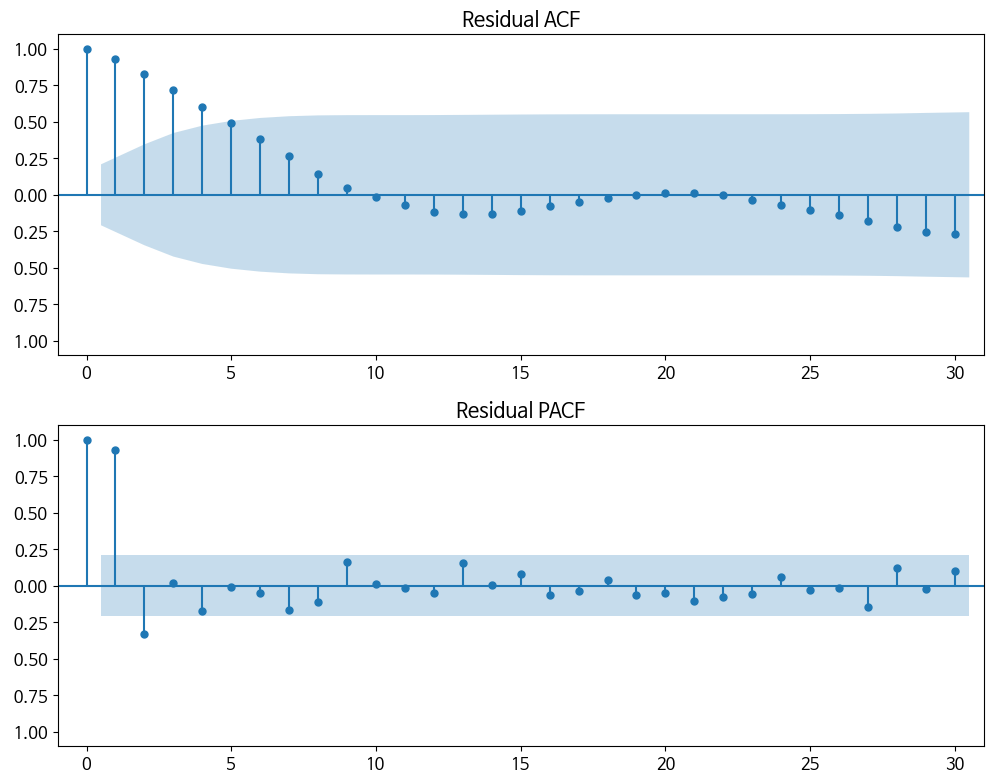

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                consump   No. Observations:                   88
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -327.699
Date:                Sat, 04 Nov 2023   AIC                            665.398
Time:                        04:48:36   BIC                            677.784
Sample:                    01-01-1960   HQIC                           670.388
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.5961     47.455     -0.792      0.428    -130.606      55.414
m2             1.1232      0.032     35.113      0.000       1.060       1.186
ar.L1          0.9330      0.041     22.611      0.000       0.852       1.014
ma.L1          0.3106      0.091      3.395      0.001       0.131       0.490
sigma2        97.4808     11.955      8.154      0.000      74.049     120.912
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                18.50
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              18.94   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

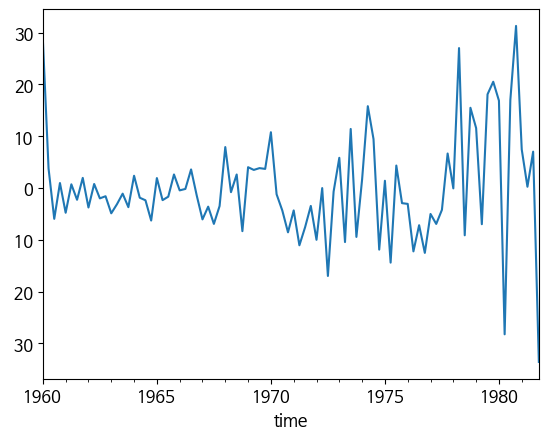

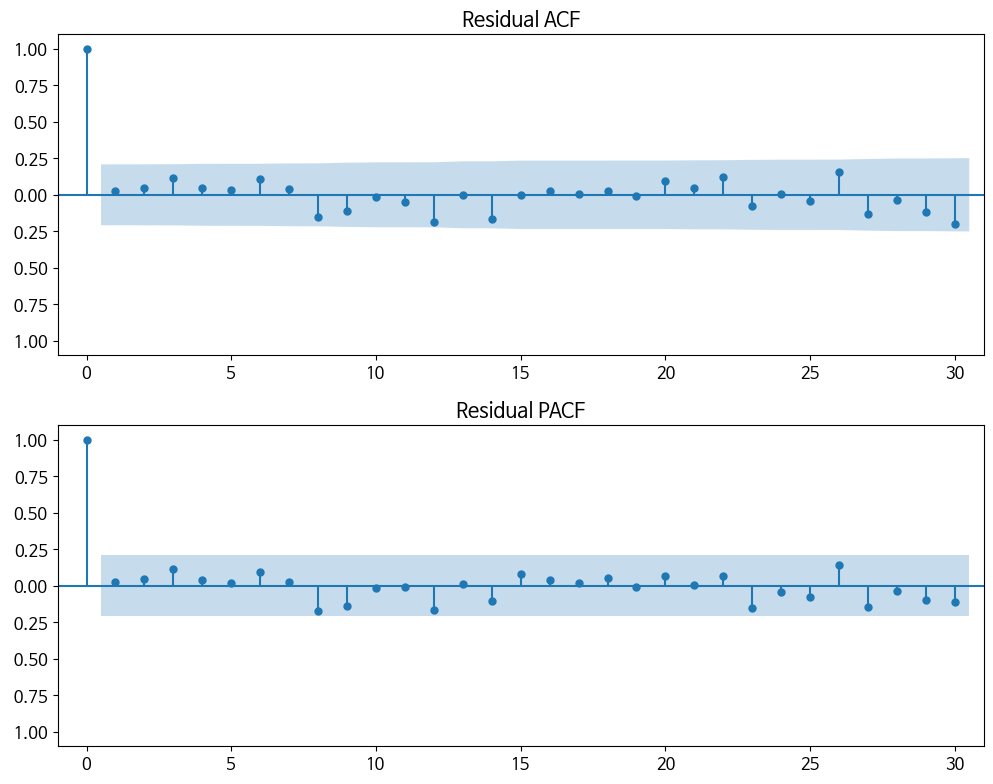

In [ ]:
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 로딩 및 확인
source_url = requests.get('http://www.stata-press.com/data/r12/friedman2.dta').content
raw = pd.read_stata(BytesIO(source_url))
raw.index = raw.time
raw_using = raw.loc['1960':'1981',["consump", "m2"]]
raw_using.plot()
plt.show()

# 모델링
## 회귀분석
fit = sm.OLS(raw_using.consump, sm.add_constant(raw_using.m2)).fit()
display(fit.summary())

## 잔차 확인
fit.resid.plot()
plt.show()

## 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(fit.resid, lags=30, ax=plt.subplot(211))
plt.xlim(-1, 31)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=30, ax=plt.subplot(212))
plt.xlim(-1, 31)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

# 모델링
## ARIMAX

fit = sm.tsa.ARIMA(raw_using.consump, order = (1,0,1), exog=raw_using.m2).fit()
display(fit.summary())

## 잔차 확인
fit.resid.plot()
plt.show()

## 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(fit.resid, lags=30, ax=plt.subplot(211))
plt.xlim(-1, 31)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=30, ax=plt.subplot(212))
plt.xlim(-1, 31)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

In [ ]:
# 모델링
## ARIMAX

fit = sm.tsa.ARIMA(raw_using.consump, order = (1,0,1)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                consump   No. Observations:                   88
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -381.102
Date:                Sat, 04 Nov 2023   AIC                            770.204
Time:                        04:48:41   BIC                            780.114
Sample:                    01-01-1960   HQIC                           774.196
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        841.7517   8592.356      0.098      0.922    -1.6e+04    1.77e+04
ar.L1          0.9995      0.010    102.890      0.000       0.980       1.019
ma.L1          0.6255      0.078      8.050      0.000       0.473       0.778
sigma2       307.7388     44.693      6.886      0.000     220.142     395.336
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                84.54
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              25.91   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""